In [78]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
# read the data
df = pd.read_csv('full_data.csv')
df.head()

,Unnamed: 0,id,Song title,Artist,Current Ranking,Number of weeks on billboard,Peak Ranking,Date,Danceability,Energy,...,Loudness,Mode,Speechiness,Acousticness,Instrumnetalness,Liveliness,Valence,Tempo,Duration ms,Time Signature
0,0,1,All I Want For Christmas Is You,Mariah Carey,1,17,1,2022-01-01,0.626,0.357,...,-7.166,0.0,0.0631,0.354,0.0,0.0552,0.401,179.869,238867.0,3.0
1,1,2,Last Christmas,Wham!,2,15,2,2022-01-01,0.620,0.573,...,-11.893,1.0,0.0423,0.271,0.0,0.0607,0.897,81.548,231333.0,4.0
2,2,3,Rockin' Around The Christmas Tree,Brenda Lee,3,13,3,2022-01-01,0.589,0.472,...,-8.749,1.0,0.0502,0.614,0.0,0.5050,0.898,67.196,126267.0,4.0
3,3,4,Jingle Bell Rock,Bobby Helms,4,13,4,2022-01-01,0.754,0.424,...,-8.463,1.0,0.0363,0.643,0.0,0.0652,0.806,119.705,130973.0,4.0
4,4,5,abcdefu,GAYLE,5,6,2,2022-01-01,0.695,0.540,...,-5.692,1.0,0.0493,0.299,0.0,0.3670,0.415,121.932,168602.0,4.0


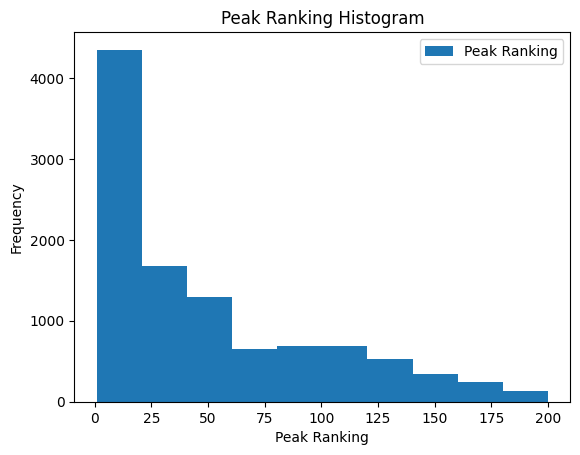

,Unnamed: 0,id,Current Ranking,Number of weeks on billboard,Peak Ranking,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumnetalness,Liveliness,Valence,Tempo,Duration ms,Time Signature
Unnamed: 0,1.000000,1.000000,0.018868,0.058626,-0.076726,-0.022792,0.001302,-0.027630,-0.011911,-0.007234,-0.047208,0.024356,-0.024310,0.036112,-0.056405,-0.039638,0.003878,-0.064957
id,1.000000,1.000000,0.018868,0.058626,-0.076726,-0.022792,0.001302,-0.027630,-0.011911,-0.007234,-0.047208,0.024356,-0.024310,0.036112,-0.056405,-0.039638,0.003878,-0.064957
Current Ranking,0.018868,0.018868,1.000000,0.127934,0.586478,-0.064440,0.036269,-0.040982,-0.032996,0.070790,-0.012346,-0.029839,0.036887,0.027311,0.036336,0.005930,0.090076,0.022166
Number of weeks on billboard,0.058626,0.058626,0.127934,1.000000,-0.165242,-0.068415,0.014915,0.019944,0.039828,0.030444,-0.143871,0.065007,-0.005293,-0.055466,0.091871,-0.024260,0.109124,0.121373
Peak Ranking,-0.076726,-0.076726,0.586478,-0.165242,1.000000,-0.098146,0.077186,-0.062989,-0.047613,0.133769,-0.101712,-0.023780,-0.008039,0.048596,0.060546,0.006969,0.115900,0.012564
Danceability,-0.022792,-0.022792,-0.064440,-0.068415,-0.098146,1.000000,0.274755,0.080892,0.348210,-0.110360,0.210600,-0.278498,-0.089299,-0.169311,0.464422,-0.158938,-0.271639,0.326014
Energy,0.001302,0.001302,0.036269,0.014915,0.077186,0.274755,1.000000,0.078808,0.745333,0.043449,0.044728,-0.609453,-0.063317,-0.032369,0.357522,0.106957,-0.095594,0.318163
Key,-0.027630,-0.027630,-0.040982,0.019944,-0.062989,0.080892,0.078808,1.000000,0.019240,-0.229181,0.037916,-0.035558,0.058989,-0.027240,0.094610,0.104086,-0.041884,-0.048621
Loudness,-0.011911,-0.011911,-0.032996,0.039828,-0.047613,0.348210,0.745333,0.019240,1.000000,0.046478,0.078932,-0.439794,-0.131927,-0.095198,0.318963,-0.045447,-0.171407,0.284047
Mode,-0.007234,-0.007234,0.070790,0.030444,0.133769,-0.110360,0.043449,-0.229181,0.046478,1.000000,-0.168269,0.073499,0.060172,-0.108741,0.084224,-0.007423,-0.007594,0.004844


In [86]:
peak = df.plot.hist(y='Peak Ranking')

# Set the title and labels of the plot
peak.set_title('Peak Ranking Histogram')
peak.set_xlabel('Peak Ranking')
peak.set_ylabel('Frequency')

# Show the peak ranking histogram
plt.show()

# From the histogram shown, we need to perfom binning

# Plot Correlation Matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [57]:
X = df[['Song title', 'Artist','Number of weeks on billboard', 'Peak Ranking', 
        'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
        'Acousticness', 'Instrumnetalness', 'Liveliness', 
        'Valence', 'Tempo', 'Duration ms', 'Time Signature']]
y = df['Current Ranking']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

In [58]:
# Encode categorical features
#import label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Artist', 'Song title']
X_train[cols] = X_train[cols].apply(le.fit_transform)
X_test[cols] = X_test[cols].apply(le.fit_transform)

# Scale continuous features
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

X_train[['Song title', 'Artist','Number of weeks on billboard', 'Peak Ranking', 
        'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
        'Acousticness', 'Instrumnetalness', 'Liveliness', 
        'Valence', 'Tempo', 'Duration ms', 'Time Signature']] = scaler.fit_transform(X_train[['Song title', 'Artist','Number of weeks on billboard', 'Peak Ranking', 
        'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
        'Acousticness', 'Instrumnetalness', 'Liveliness', 
        'Valence', 'Tempo', 'Duration ms', 'Time Signature']])

X_test[['Song title', 'Artist','Number of weeks on billboard', 'Peak Ranking', 
        'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
        'Acousticness', 'Instrumnetalness', 'Liveliness', 
        'Valence', 'Tempo', 'Duration ms', 'Time Signature']] = scaler.fit_transform(X_test[['Song title', 'Artist','Number of weeks on billboard', 'Peak Ranking', 
        'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
        'Acousticness', 'Instrumnetalness', 'Liveliness', 
        'Valence', 'Tempo', 'Duration ms', 'Time Signature']])

#create 8 equal bins for y_test & y_train
bin_y_train = pd.cut(y_train, bins=8, labels=False)
# print(bin_y_train.value_counts())

bin_y_test = pd.cut(y_test, bins=8, labels=False)
# print(bin_y_test.value_counts())

In [65]:
#Logistic Regression

# define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100]}

# perform a grid search over the parameter grid using cross-validation
lr_cv = GridSearchCV(LogisticRegression(random_state=109, multi_class='ovr'), param_grid, cv=5, scoring = 'f1_macro')
lr_cv.fit(X_train, bin_y_train)

# use the best hyperparameters to fit the model and make predictions on the test set
best_lr = lr_cv.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# evaluate the performance of the model on the test set
print('Multiclass Logistic Regression Scores:')
print('F1 Score:', f1_score(bin_y_test, y_pred_lr, average = 'weighted'))
print('Precision:', precision_score(bin_y_test, y_pred_lr, average = 'weighted'))
print('Recall:', recall_score(bin_y_test, y_pred_lr, average = 'weighted'))
print('Accuracy:', accuracy_score(bin_y_test, y_pred_lr))

Multiclass Logistic Regression Scores:
F1 Score: 0.1762147006291993
Precision: 0.1837261930791418
Recall: 0.21132075471698114
Accuracy: 0.21132075471698114


In [66]:
#Support Vector Machines

# Use GridSearchCV to find the best hyperparameters for SVM
svm = SVC(random_state=109)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'decision_function_shape': ['ovr', 'ovo']}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, bin_y_train)
svm = grid_search.best_estimator_

# reduce the number of features using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Use feature selection to select the most important features
selector = SelectKBest(f_classif, k='all')
selector.fit(X_train, bin_y_train)
X_train = selector.transform(X_train)
X_val = selector.transform(X_test)

# Train the SVM model on the selected features
svm.fit(X_train, bin_y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate the performance of the SVM model
print('Multiclass Support Vector Machine Scores:')
print('F1 Score:', f1_score(bin_y_test, y_pred_svm, average = 'weighted'))
print('Precision:', precision_score(bin_y_test, y_pred_svm, average = 'weighted'))
print('Recall:', recall_score(bin_y_test, y_pred_svm, average = 'weighted'))
print('Accuracy:', accuracy_score(bin_y_test, y_pred_svm))

KeyboardInterrupt: 

In [63]:
#Adaboost

# Initialize the AdaBoost model
ada = AdaBoostClassifier(random_state=109)

# Define the hyperparameters to search over using GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [100, 500, 1000]}

# Use GridSearchCV to find the best hyperparameters for the model
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, bin_y_train)
ada = grid_search.best_estimator_

# Train the AdaBoost model on the selected features
ada.fit(X_train, bin_y_train)
y_pred_ada = ada.predict(X_test)

# Evaluate the performance of the AdaBoost model
print('Multiclass AdaBoost Scores:')
print('F1 Score:', f1_score(bin_y_test, y_pred_ada, average='weighted'))
print('Precision:', precision_score(bin_y_test, y_pred_ada, average='weighted'))
print('Recall:', recall_score(bin_y_test, y_pred_ada, average='weighted'))
print('Accuracy:', accuracy_score(bin_y_test, y_pred_ada))

AdaBoost Scores:
F1 Score: 0.004600321088031393
Precision: 0.12188679245283018
Recall: 0.0023584905660377358
Accuracy: 0.0023584905660377358


/Users/jodytng/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jodytng/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Gradient Boosting

# Initialize the Gradient Boosting model
gboost = GradientBoostingClassifier(random_state = 109)

# Define the hyperparameters to search over using GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7]}

# Use GridSearchCV to find the best hyperparameters for the model
grid_search = GridSearchCV(gboost, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, bin_y_train)
gboost = grid_search.best_estimator_

# Train the Gradient Boosting model on the selected features
gboost.fit(X_train, bin_y_train)
y_pred_gboost = gboost.predict(X_test)

# Evaluate the performance of the Gradient Boosting model
print('Multiclass Gradient Boosting Scores:')
print('F1 Score:', f1_score(bin_y_test, y_pred_gboost, average='weighted'))
print('Precision:', precision_score(bin_y_test, y_pred_gboost, average='weighted'))
print('Recall:', recall_score(bin_y_test, y_pred_gboost, average='weighted'))
print('Accuracy:', accuracy_score(bin_y_test, y_pred_gboost))

### Summary table to show the performance of the models

#precision to 3sf 

Model| F1 Score | Precision | Recall | Accuracy |
---|---|---|---|---|
Multiclass Logistic Regression | 0.256 | 0.251 | 0.290 | 0.290 | 
Multiclass Support Vector Machine | 0.384 | 0.390 | 0.397 | 0.396 | 
Multiclass Adaboost | 0.701 | 0.788 | 0.631 | 0.869 | 
Multiclass Gradient Boosting | 0.704 | 0.774 | 0.646 | 0.869 |

In [ ]:
# Make predictions on the test set using the best model (Gradient Boosting)
test_preds = pd.DataFrame(y_pred_gboost)

In [ ]:
# Save the predictions to a csv file
test_preds.to_csv('Charted_predict.csv', header = ['y'], index_label = 'Index')